<a href="https://colab.research.google.com/github/nadje/Parkinsons-Disease-Classification/blob/main/dataset_2_classification_FOLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix as CM

from sklearn.preprocessing import StandardScaler #import the module to perform standardization
from sklearn.decomposition import PCA #import the module to perform Principal Component Analysis
from sklearn.model_selection import train_test_split #import package to create the train and test dataset
from sklearn.linear_model import LogisticRegression #import package to perform Logistic Regression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier #import package to perform ensemble models
from sklearn.ensemble import GradientBoostingClassifier #import package to perform Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier #import package to perform k-NN classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve,precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve #import precision-recall curve
import bisect #import module to provide support for maintaining a list in sorted order without having to sort the list after each insertion
from scipy.stats import mstats #import module to evaluate some statistical objects
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KernelDensity
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [12]:
url = 'https://raw.githubusercontent.com/nadje/Parkinsons-Disease-Classification/main/pd_speech_features.csv'
dat = pd.read_csv(url)

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Columns: 755 entries, 0 to 1.1
dtypes: float64(749), int64(6)
memory usage: 4.3 MB


In [13]:
dat.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [15]:
#Añadido para kfold

#Se crea un vector con la clase
label=dat['class']
#Se crea un vector con el nombre del paciente
IDpaciente=dat['id']
#Se crea un vector con  números consecutivos para identificar  la observación
NoObs = pd.Series(np.arange(1,len(IDpaciente)+1))


In [16]:
datNum=dat.drop('class', axis=1)
datNum=datNum.drop('id', axis=1)

y=dat[['class']]

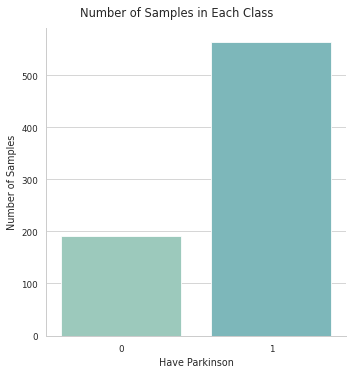

In [17]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=dat, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Parkinson')
plt.show()

## Validación cruzada.División de los datos en training y test con StratifiedGroupKFold
Está basado en una implementación de sklearn.model_selection.StratifiedGroupKFold

En primer lugar distribuye todas las observaciones dentro de un mismo grupo de forma conjunta. De esta manera la variable
grupo es el identificador de paciente y se asegura que todas las observaciones de un mismo paciente estén en el grupo train o test pero nunca compartiendo información.
Posteriormente estratifica en función de la variable Presencia Parkinson Disease, manteniendo el porcentaje de sujetos con enfermedad y sin enfermedad que existen en la población antes de dividir los datos
En cada split formado por training+test se utilizan el total de sujetos disponibles 252 destinando para test sujetos no incluidos en otros splits.

-groups =IDpaciente, la variable que mantiene la identificación del paciente para agrupar todas las observaciones que pertenecen a un mismo paciente
-train_x =NoObs , el no de fila
-train_y = label, presencia o no de enfermedad

NSplits=será el número de splits. Para un modelo seleccionado cada split separa training de test que se utiliza para ajustar y validar accuracy/AUC. Entre diferentes splits 



In [18]:

import random
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter, defaultdict



def stratified_group_k_fold(X, y, groups, k, seed=None):
    labels_num = np.max(y) + 1
    y_counts_per_group = defaultdict(lambda: np.zeros(labels_num))
    y_distr = Counter()
    for label, g in zip(y, groups):
        y_counts_per_group[g][label] += 1
        y_distr[label] += 1
    #endfor
    y_counts_per_fold = defaultdict(lambda: np.zeros(labels_num))
    groups_per_fold = defaultdict(set)

    def eval_y_counts_per_fold(y_counts, fold):
        y_counts_per_fold[fold] += y_counts
        std_per_label = []
        for label in range(labels_num):
            label_std = np.std([y_counts_per_fold[i][label] / y_distr[label] for i in range(k)])
            std_per_label.append(label_std)
        #endfor
        y_counts_per_fold[fold] -= y_counts
        return np.mean(std_per_label)
    #enddef
    groups_and_y_counts = list(y_counts_per_group.items())
    random.Random(seed).shuffle(groups_and_y_counts)
    #Seed es una variable que guarda el número dónde empieza la psecuenciapseudo dado a través argumento
    #función
    
    for g, y_counts in sorted(groups_and_y_counts, key=lambda x: -np.std(x[1])):
        best_fold = None
        min_eval = None
        for i in range(k):
            fold_eval = eval_y_counts_per_fold(y_counts, i)
            if min_eval is None or fold_eval < min_eval:
                min_eval = fold_eval
                best_fold = i
            #endif
        #endfor
        y_counts_per_fold[best_fold] += y_counts
        groups_per_fold[best_fold].add(g)

    #endfor
    all_groups = set(groups)
    for i in range(k):
        train_groups = all_groups - groups_per_fold[i]
        test_groups = groups_per_fold[i] #Van a ser los de desarrollo y validación

        train_indices = [i for i, g in enumerate(groups) if g in train_groups]
        test_indices = [i for i, g in enumerate(groups) if g in test_groups]

        yield train_indices, test_indices
    #endfor
#enddef




train_x =NoObs #el no de observación  de cada fila, sin los features
train_y = label # la label
groups =IDpaciente #el patient id
NSplits=3


#Train x solo sirve para distribuir no lleva los features
def get_distribution(y_vals):
        y_distr = Counter(y_vals)
        y_vals_sum = sum(y_distr.values())
        return [f'{y_distr[i] / y_vals_sum:.5%}' for i in range(np.max(y_vals) + 1)]
#enddef

distrs = [get_distribution(train_y)]
index = ['Población']

for Split_ind, (dev_ind, val_ind) in enumerate(stratified_group_k_fold(train_x, train_y, 
                                                                      groups, k=NSplits,seed=125), 1):
    dev_y, val_y = train_y[dev_ind], train_y[val_ind]
    dev_groups, val_groups = groups[dev_ind], groups[val_ind]
    
    # making sure that train and validation group do not overlap:
    assert len(set(dev_groups) & set(val_groups)) == 0
    
    distrs.append(get_distribution(dev_y))
    index.append(f'Training set - Split {Split_ind}')
    distrs.append(get_distribution(val_y))
    index.append(f'Test set - Split {Split_ind}')
#endfor
display('Distribution per class:')
pd.DataFrame(distrs, index=index, columns=[f'Label {l}' for l in range(np.max(train_y) + 1)])

'Distribution per class:'

,Label 0,Label 1
Población,25.39683%,74.60317%
Training set - Split 1,25.14970%,74.85030%
Test set - Split 1,25.88235%,74.11765%
Training set - Split 2,25.59524%,74.40476%
Test set - Split 2,25.00000%,75.00000%
Training set - Split 3,25.44379%,74.55621%
Test set - Split 3,25.30120%,74.69880%


In [19]:
train_index=[]
test_index=[]
i=1
for Split_ind, (dev_ind, val_ind) in enumerate(stratified_group_k_fold(train_x, train_y,
                                                                      groups, k=NSplits,seed=125), 1):
    
    dev_ind=np.array(dev_ind)
    val_ind=np.array(val_ind)
    
        
    train_index.append(dev_ind)
    test_index.append(val_ind)
    print("########SPLIT",i)
    print("TRAIN:")
    print("Ids únicos de Pacientes TRAIN SPLIT",i)
    print(groups[dev_ind].unique())
    frame= pd.DataFrame()
    frame['NoObs']=train_x[dev_ind].copy()
    frame['IdPaciente']=groups[dev_ind].copy()
    frame['Class']=train_y[dev_ind].copy()
    print(frame)
    print("Total observaciones TEST SPLIT",i)
    print(len(groups[dev_ind]))
    
    frame=frame.drop_duplicates(subset = "IdPaciente")    
    print("")
    print('No pacientes con PD 1 y NoPD 0 TRAIN SPLIT',i)
    print(frame['Class'].value_counts())
    print("")
    print("Total pacientes TRAIN SPLIT",i)
    print(len(groups[dev_ind].unique()))
    
    print()
    print("             ")
    print(" TEST:")
    print("Ids únicos de Pacientes TEST SPLIT",i)
    print(groups[val_ind].unique())
    frame= pd.DataFrame()
    frame['NoObs']=train_x[val_ind].copy()
    frame['IdPaciente']=groups[val_ind].copy()
    frame['Class']=train_y[val_ind].copy()
    print(frame)
    print("Total observaciones TEST SPLIT",i)
    print(len(groups[val_ind]))
    frame=frame.drop_duplicates(subset = "IdPaciente")    
    print("")
    print('No pacientes con PD 1 y NoPD 0 TEST SPLIT',i)
    print(frame['Class'].value_counts())
    print("")
    print("Total pacientes TEST SPLIT",i)
    print(len(groups[val_ind].unique()))
    i+=1

#endfor    

########SPLIT 1
TRAIN:
Ids únicos de Pacientes TRAIN SPLIT 1
[  0   1   2   3   6   9  10  11  14  16  17  20  21  23  27  30  31  33
  35  36  38  39  40  41  42  43  46  50  51  52  54  55  56  57  58  59
  60  61  63  64  66  68  70  71  73  74  75  77  78  79  81  82  83  85
  86  87  89  91  93  94  95  97  98  99 101 103 104 105 106 107 109 110
 111 112 113 115 117 118 119 123 124 125 129 130 131 132 133 134 135 136
 137 139 140 141 143 144 145 146 147 149 151 152 156 158 160 161 162 163
 164 165 166 167 168 169 170 171 172 174 175 176 177 178 180 181 184 185
 187 190 191 192 193 194 195 196 197 198 200 201 202 204 207 209 210 212
 213 214 215 218 219 221 224 225 228 229 230 233 234 236 240 241 242 244
 245 246 247 249 251]
     NoObs  IdPaciente  Class
0        1           0      1
1        2           0      1
2        3           0      1
3        4           1      1
4        5           1      1
..     ...         ...    ...
748    749         249      1
749    750         2

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score

In [33]:
#Función ajuste y predicción de los modelos
conf_matrix_all = {}
def parkinsons_disease_prediction(name, algo, training_x,  testing_x,  training_y, testing_y, plot) :
 
    algo.fit(training_x,training_y)
    # Fit the training data set to the algorithm passed.
    #corresponderá con fit(X_train_std, y_train)
    
    predictions = algo.predict(testing_x)                     # Get all predictions
    #corresponderrá con predict(X_test_std)
    
    probabilities = algo.predict_proba(testing_x)             # Get probablities of predictions
    #corresponderrá con predict_proba(X_test_std)
    
    conf_matrix = confusion_matrix(testing_y, predictions)    # Get confusion matrix using the predictions
    #corresponderá  (y_test, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    conf_matrix_all[name] = conf_matrix                       # Save confusion matrix values to a dictionary
    
    print("Classification report:")                           # Print the classification report
    print(classification_report(testing_y, predictions))

    print("\nSensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)")
    print(tp / (tp + fn))

    print("\nSpecificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)")
    print(tn / (tn + fn))

    model_roc_auc = roc_auc_score(testing_y, predictions)           # Get the Area under the curve number
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])   # Get False postive rate and true positive rate
    accuracy = (tp+tn)/(tn+tp+fn+fp)
    
    #print ("\nArea under the curve: ", model_roc_auc)
    
    if plot:
        fig, axes = plt.subplots(1,2, figsize=(20, 7))
        conf_matrix = np.flip(conf_matrix)
        plt.rcParams.update({'font.size': 25})

        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);                                           # Plot the confusion matrix
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(fpr, tpr, ax=axes[1])                                         # Graficar la curva ROC
        plt.plot([0, 1], [0, 1],'--')                                              # Graficar la línea diagonal
        axes[1].set_xlim([0, 1])                                                   # Poner el límite del eje X en 0 y 1
        axes[1].set_ylim([0, 1])                                                   # Poner el límite del eje Y en 0 y 1
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
        plt.rc('axes', labelsize=25) 
        plt.show();
    return model_roc_auc, accuracy

In [31]:
#Función para calcular accuracy de los diferentes modelos con groupkfoldstratified

def CVcalculo(Name,selectedmodel,NSplits,datNum, label, train_index, test_index):

    acc_score = []
    roc_AUC_score=[]

    for Split in np.arange(0,NSplits):

        X_train , X_test = datNum.iloc[train_index[Split],:],datNum.iloc[test_index[Split],:]
        y_train , y_test = label[train_index[Split]] , label[test_index[Split]]
   

        #Estandarización Se estandariza solo la parte de train se calcula los parámetros y se aplica
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        #Se aplica los parámetros obtenido estandarización
        X_test_std = sc.transform(X_test)
    
        #Ajuste Modelo  
        #inicio ajuste modelo y predicción
        print("Split",Split+1)
        print()
        roc_auc, acc = parkinsons_disease_prediction(Name, selectedmodel,X_train_std, X_test_std,  y_train, y_test, plot=True) 
    
        acc_score.append(acc)
        roc_AUC_score.append(roc_auc)
        print("######################################")
        print("Split",Split+1)
        print("accuracy")
        print(acc*100)
        print("AUC")
        print(roc_auc)
        print("######################################")
        print()
        print()
    acc_score=np.array(acc_score)
    roc_AUC_score=np.array(roc_AUC_score)

    print()
    print("SUMMARY")
    print("Mean of Splits Accuracy: {:.2f} %".format(acc_score.mean()*100))
    print("Standard Deviation of Splits Accuracy: {:.2f} %".format(acc_score.std()*100))
    print()
    print("Mean of Splits AUC ROC : {:.2f} ".format(roc_AUC_score.mean()))
    print("Standard Deviation of Splits AUC ROC : {:.2f} ".format(roc_AUC_score.std()))
    return acc_score.mean(),roc_AUC_score.mean()



# Models

## KNN

Split 1

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        66
           1       0.83      0.92      0.87       189

    accuracy                           0.80       255
   macro avg       0.75      0.69      0.71       255
weighted avg       0.79      0.80      0.79       255


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.9206349206349206

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.6666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 1
accuracy
80.0
AUC
0.6875901875901875
######################################


Split 2

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        63
           1       0.81      0.90      0.85       189

    accuracy                           0.77       252
   macro avg       0.68      0.63      0.65       252
weighted avg       0.74      0.77      0.75       252


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8994708994708994

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.5476190476190477


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 2
accuracy
76.5873015873016
AUC
0.6322751322751323
######################################


Split 3

Classification report:
              precision    recall  f1-score   support

           0       0.56      0.37      0.44        63
           1       0.81      0.90      0.85       186

    accuracy                           0.77       249
   macro avg       0.68      0.63      0.65       249
weighted avg       0.75      0.77      0.75       249


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.9032258064516129

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.5609756097560976


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
76.70682730923694
AUC
0.634152585765489
######################################



SUMMARY
Mean of Splits Accuracy: 77.76 %
Standard Deviation of Splits Accuracy: 1.58 %

Mean of Splits AUC ROC : 0.65 
Standard Deviation of Splits AUC ROC : 0.03 


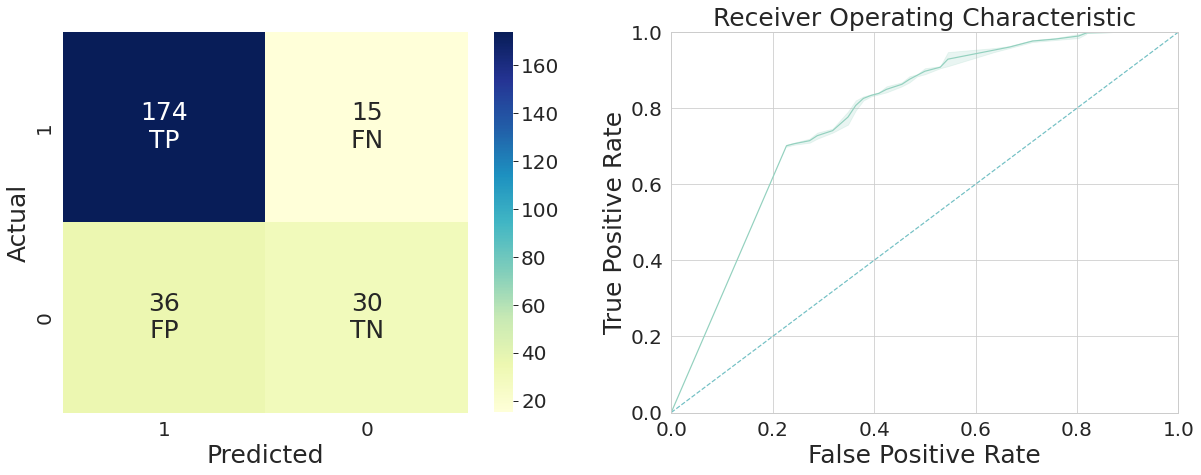

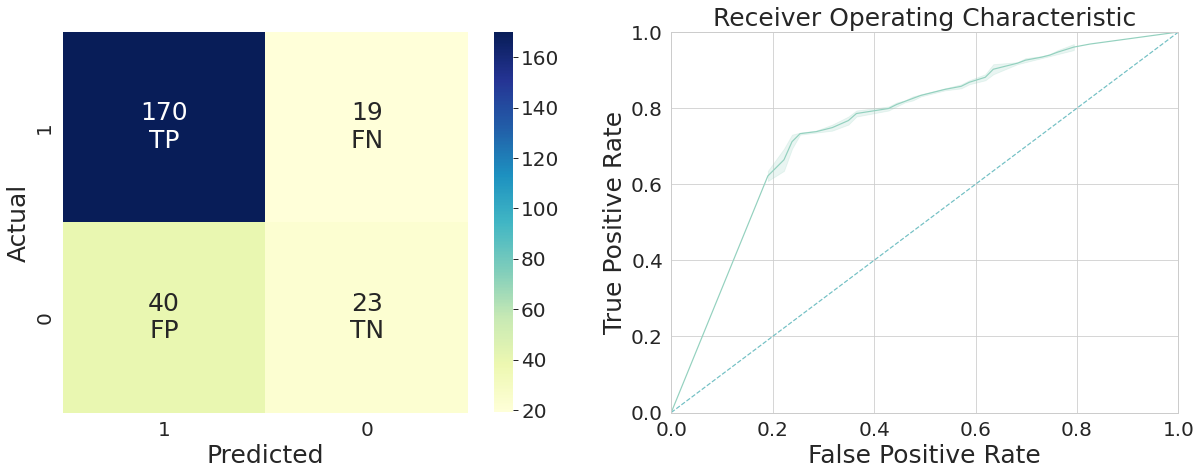

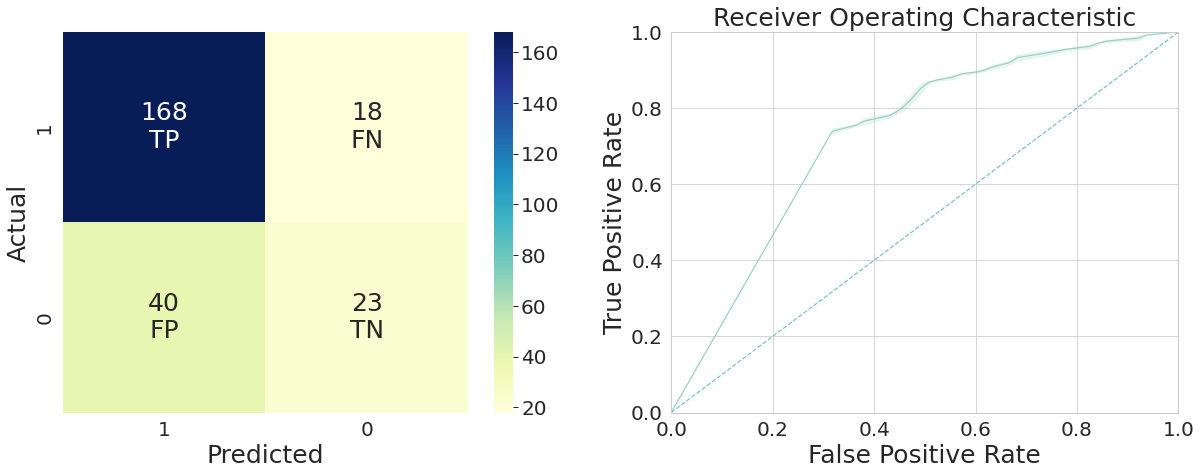

In [35]:
knn = KNeighborsClassifier(algorithm='brute', leaf_size=21, metric='manhattan', metric_params=None, n_neighbors = 4, weights='distance') 
acc_knn_m,auc_knn_m =CVcalculo("K-Nearest Neighbours", knn,NSplits,datNum, label, train_index, test_index)


## SVM

Split 1

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        66
           1       0.82      0.85      0.83       189

    accuracy                           0.75       255
   macro avg       0.67      0.65      0.66       255
weighted avg       0.74      0.75      0.74       255


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8518518518518519

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.5172413793103449


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 1
accuracy
74.90196078431373
AUC
0.6531986531986532
######################################


Split 2

Classification report:
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        63
           1       0.81      0.85      0.83       189

    accuracy                           0.74       252
   macro avg       0.65      0.63      0.64       252
weighted avg       0.73      0.74      0.74       252


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8518518518518519

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.48148148148148145


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 2
accuracy
74.20634920634922
AUC
0.6322751322751323
######################################


Split 3

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58        63
           1       0.86      0.86      0.86       186

    accuracy                           0.79       249
   macro avg       0.72      0.72      0.72       249
weighted avg       0.79      0.79      0.79       249


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8602150537634409

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.5806451612903226


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
78.714859437751
AUC
0.7158218125960061
######################################



SUMMARY
Mean of Splits Accuracy: 75.94 %
Standard Deviation of Splits Accuracy: 1.98 %

Mean of Splits AUC ROC : 0.67 
Standard Deviation of Splits AUC ROC : 0.04 


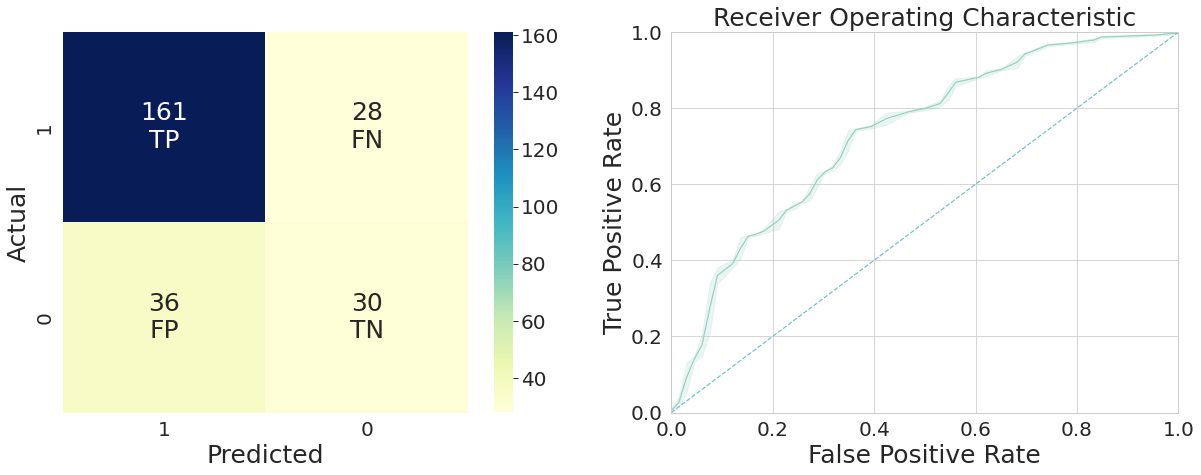

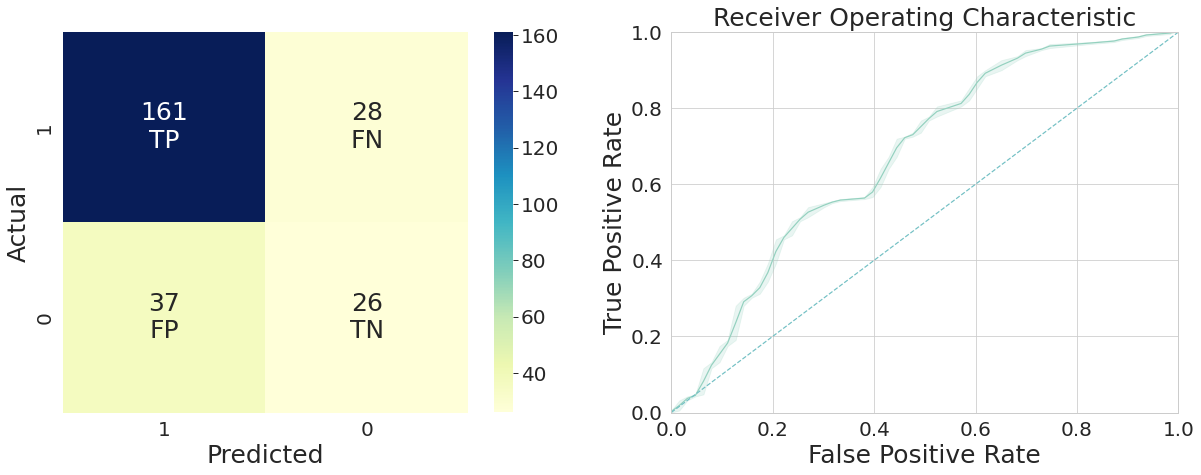

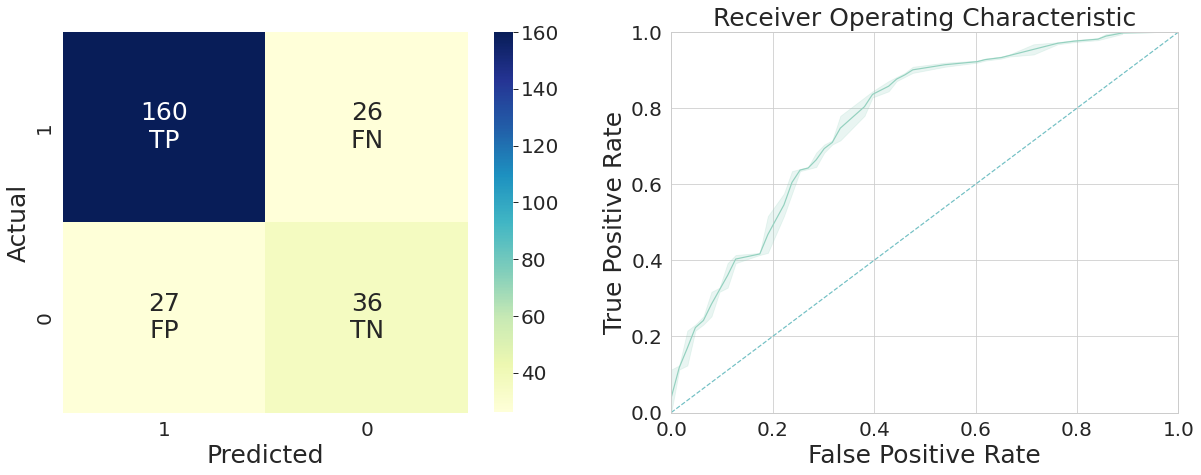

In [36]:
from sklearn.svm import SVC
svc1 = SVC(C=1.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)
acc_svm_m,auc_svm_m=CVcalculo("Support Vector Classifier", svc1,NSplits,datNum, label, train_index, test_index)
 

## Naive Bayes

Split 1

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        66
           1       0.88      0.88      0.88       189

    accuracy                           0.83       255
   macro avg       0.78      0.78      0.78       255
weighted avg       0.83      0.83      0.83       255


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8835978835978836

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.6666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 1
accuracy
82.74509803921568
AUC
0.7751322751322752
######################################


Split 2

Classification report:
              precision    recall  f1-score   support

           0       0.29      0.59      0.39        63
           1       0.79      0.51      0.62       189

    accuracy                           0.53       252
   macro avg       0.54      0.55      0.50       252
weighted avg       0.66      0.53      0.56       252


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.5132275132275133

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.2868217054263566


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 2
accuracy
53.17460317460318
AUC
0.5502645502645503
######################################


Split 3

Classification report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        63
           1       0.83      0.82      0.83       186

    accuracy                           0.74       249
   macro avg       0.66      0.67      0.66       249
weighted avg       0.75      0.74      0.74       249


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8225806451612904

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.49230769230769234


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
74.29718875502009
AUC
0.6652585765488992
######################################



SUMMARY
Mean of Splits Accuracy: 70.07 %
Standard Deviation of Splits Accuracy: 12.44 %

Mean of Splits AUC ROC : 0.66 
Standard Deviation of Splits AUC ROC : 0.09 


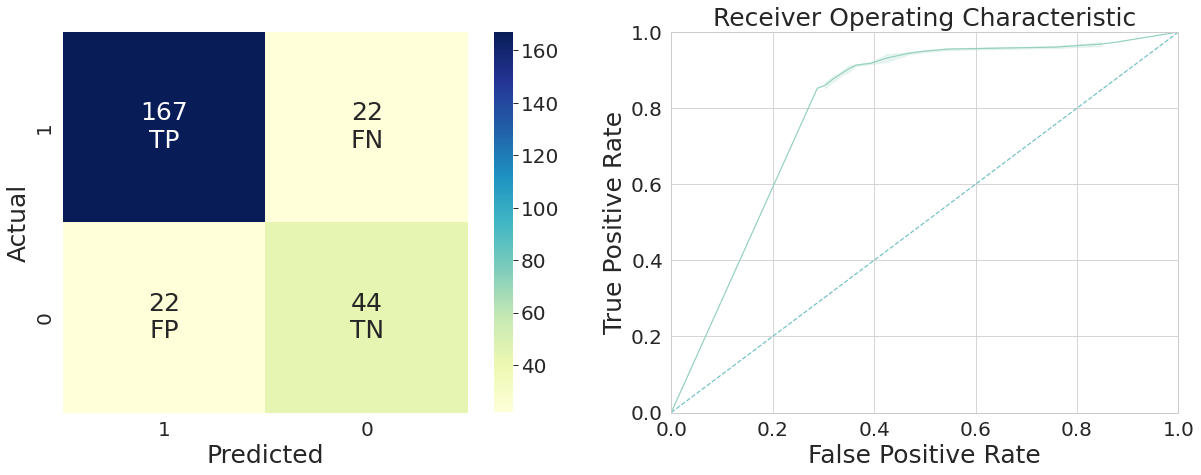

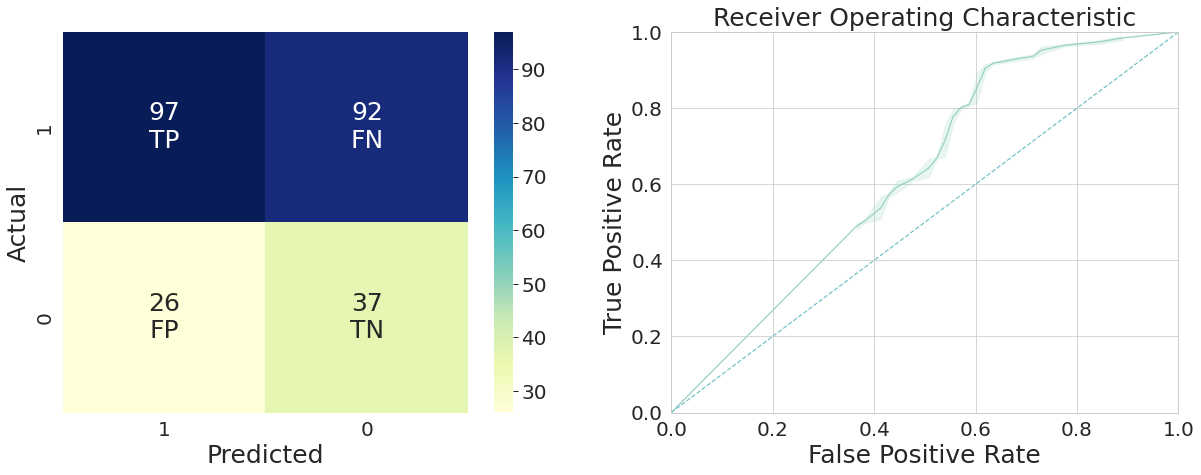

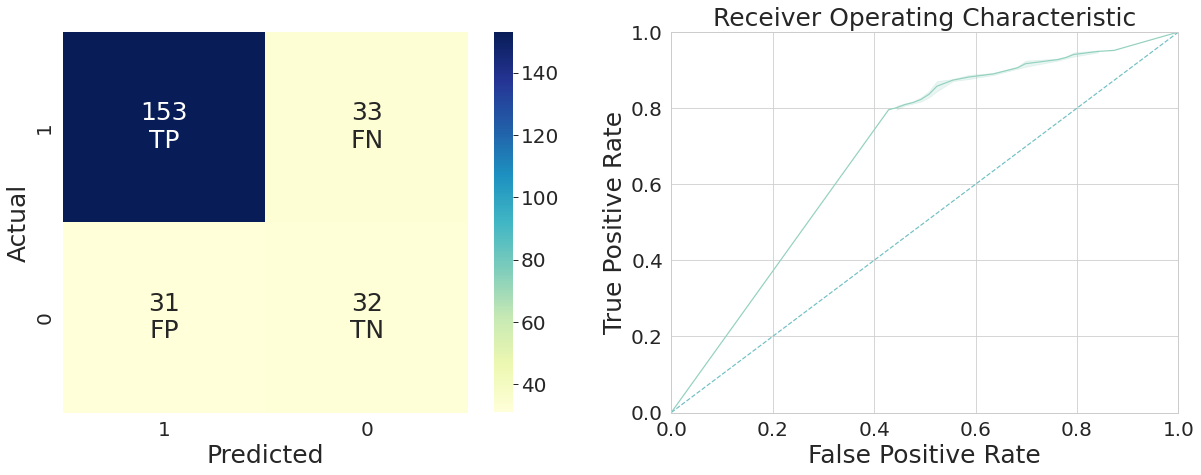

In [37]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)
acc_nb_m,auc_nb_m=CVcalculo("Gaussian Naïve Bayes", gnb,NSplits,datNum, label, train_index, test_index)


## Random forest

Split 1

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.38      0.51        66
           1       0.82      0.96      0.88       189

    accuracy                           0.81       255
   macro avg       0.80      0.67      0.70       255
weighted avg       0.81      0.81      0.79       255


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.9629629629629629

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.78125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 1
accuracy
81.17647058823529
AUC
0.6708754208754208
######################################


Split 2

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.35      0.44        63
           1       0.81      0.93      0.86       189

    accuracy                           0.78       252
   macro avg       0.71      0.64      0.65       252
weighted avg       0.76      0.78      0.76       252


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.9259259259259259

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.6111111111111112


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 2
accuracy
78.17460317460318
AUC
0.6375661375661376
######################################


Split 3

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.43      0.57        63
           1       0.83      0.98      0.90       186

    accuracy                           0.84       249
   macro avg       0.85      0.70      0.74       249
weighted avg       0.84      0.84      0.82       249


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.978494623655914

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.8709677419354839


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
83.93574297188755
AUC
0.7035330261136713
######################################



SUMMARY
Mean of Splits Accuracy: 81.10 %
Standard Deviation of Splits Accuracy: 2.35 %

Mean of Splits AUC ROC : 0.67 
Standard Deviation of Splits AUC ROC : 0.03 


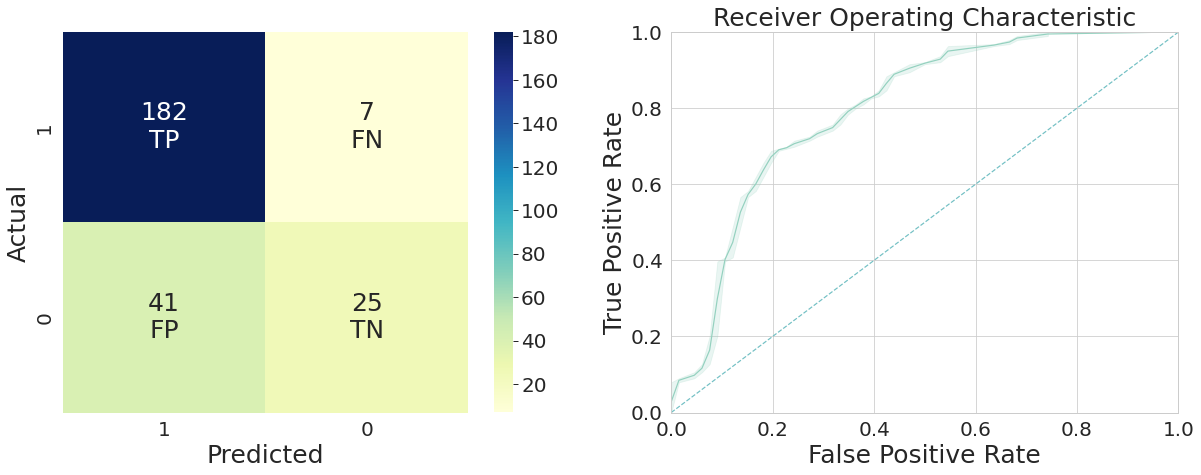

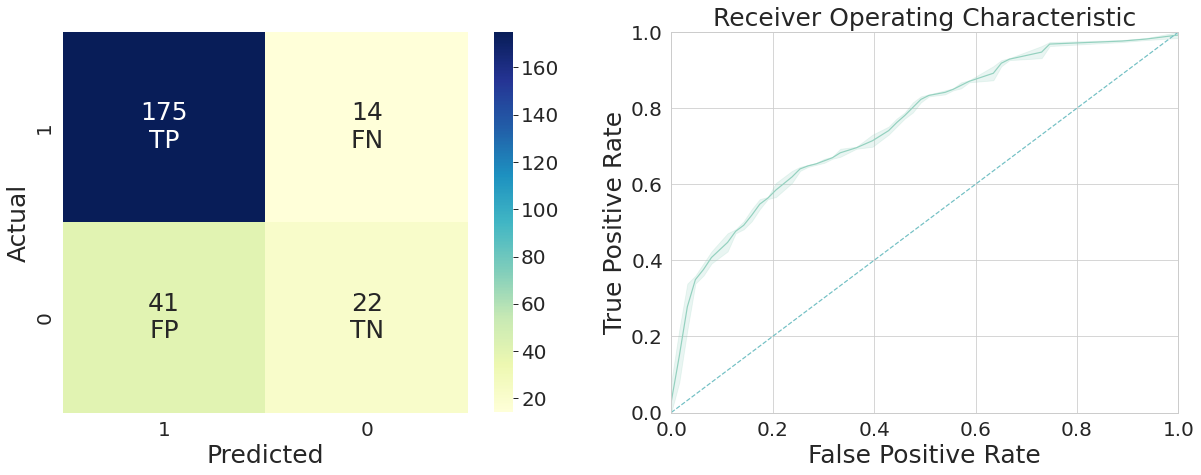

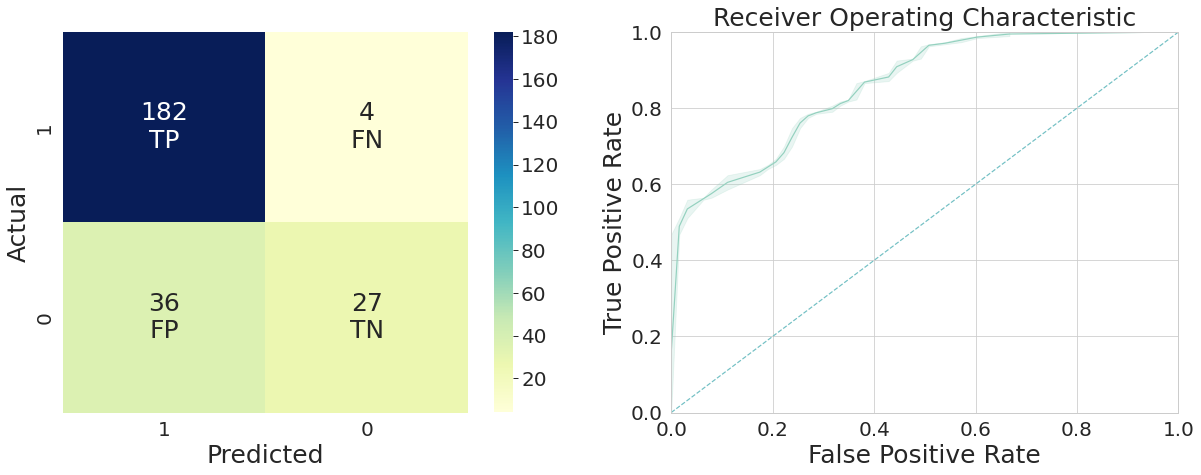

In [38]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = "gini", 
                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                               warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

acc_rf_m,auc_rf_m= CVcalculo("Random Forest", rfc,NSplits,datNum, label, train_index, test_index)
 

## Bagging Classifier

Split 1

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        66
           1       0.85      0.87      0.86       189

    accuracy                           0.79       255
   macro avg       0.72      0.71      0.72       255
weighted avg       0.78      0.79      0.78       255


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.873015873015873

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.6
######################################
Split 1
accuracy
78.82352941176471
AUC
0.7092352092352091
######################################




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Split 2

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        63
           1       0.82      0.89      0.86       189

    accuracy                           0.78       252
   macro avg       0.70      0.66      0.67       252
weighted avg       0.76      0.78      0.77       252


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8941798941798942

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.574468085106383
######################################
Split 2
accuracy
77.77777777777779
AUC
0.6613756613756614
######################################




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Split 3

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        63
           1       0.87      0.86      0.86       186

    accuracy                           0.80       249
   macro avg       0.73      0.74      0.74       249
weighted avg       0.80      0.80      0.80       249


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.8602150537634409

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
79.91967871485943
AUC
0.73963133640553
######################################



SUMMARY
Mean of Splits Accuracy: 78.84 %
Standard Deviation of Splits Accuracy: 0.87 %

Mean of Splits AUC ROC : 0.70 
Standard Deviation of Splits AUC ROC : 0.03 


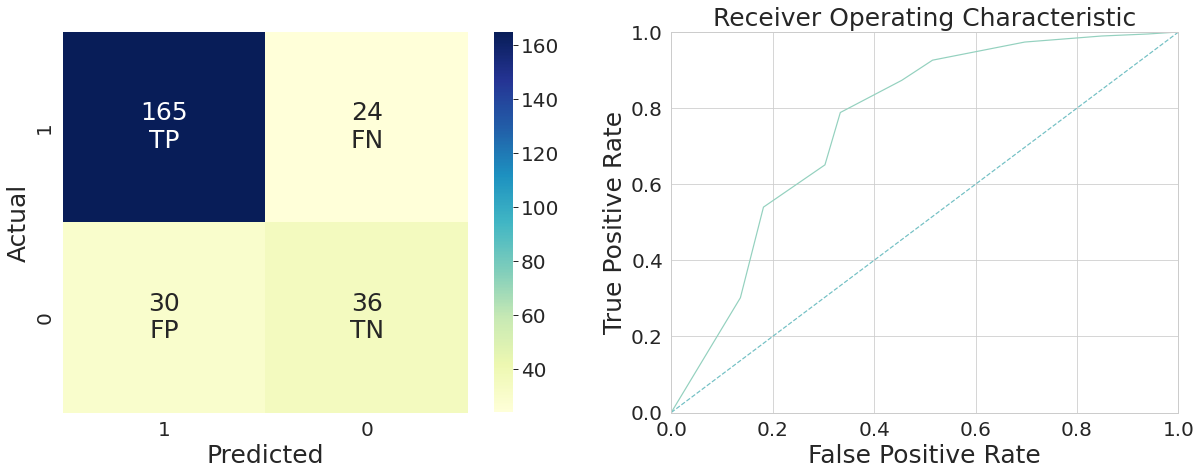

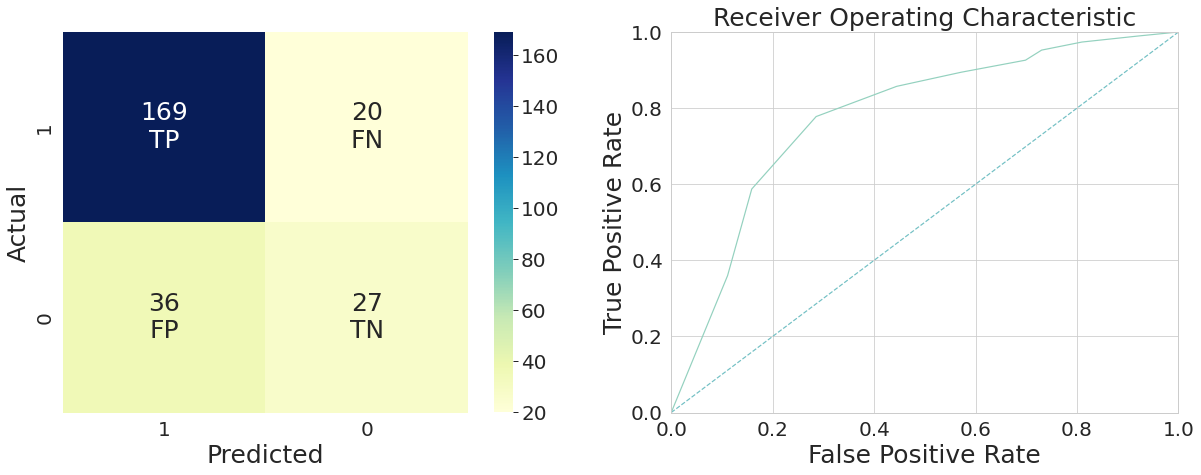

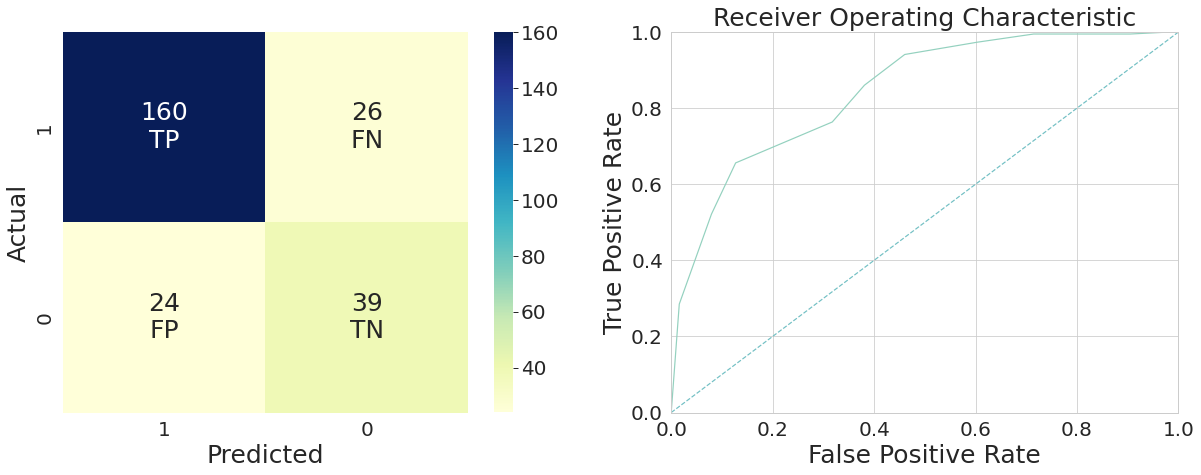

In [39]:
bcc = BaggingClassifier()

acc_bc_m,auc_bc_m=CVcalculo("Bagging Classifier", bcc,NSplits,datNum, label, train_index, test_index)


## XGBoost

In [ ]:
#pip install xgboost

In [40]:
from xgboost import XGBClassifier

Split 1

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.52      0.64        66
           1       0.85      0.97      0.91       189

    accuracy                           0.85       255
   macro avg       0.85      0.74      0.77       255
weighted avg       0.85      0.85      0.84       255


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.9682539682539683

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.85


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 1
accuracy
85.09803921568627
AUC
0.7417027417027418
######################################


Split 2

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.35      0.44        63
           1       0.81      0.92      0.86       189

    accuracy                           0.77       252
   macro avg       0.69      0.63      0.65       252
weighted avg       0.75      0.77      0.75       252


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.9153439153439153

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.5789473684210527


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 2
accuracy
77.38095238095238
AUC
0.6322751322751323
######################################


Split 3

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.54      0.67        63
           1       0.86      0.98      0.92       186

    accuracy                           0.87       249
   macro avg       0.88      0.76      0.80       249
weighted avg       0.87      0.87      0.86       249


Sensitivity measure: True Positive Rate (TPR) or the proportion of identified positives among the parkinson-positive population (class = 1)
0.978494623655914

Specificity measure: True Negative Rate (TNR), that is the proportion of identified negatives among the parkinson-negative population (class = 0)
0.8947368421052632


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
86.74698795180723
AUC
0.7590885816692269
######################################



SUMMARY
Mean of Splits Accuracy: 83.08 %
Standard Deviation of Splits Accuracy: 4.08 %

Mean of Splits AUC ROC : 0.71 
Standard Deviation of Splits AUC ROC : 0.06 


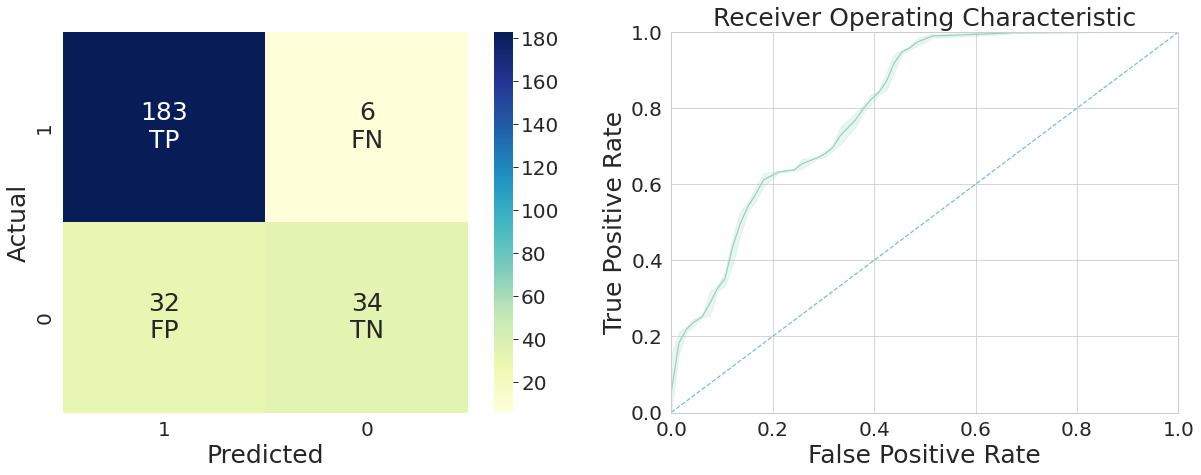

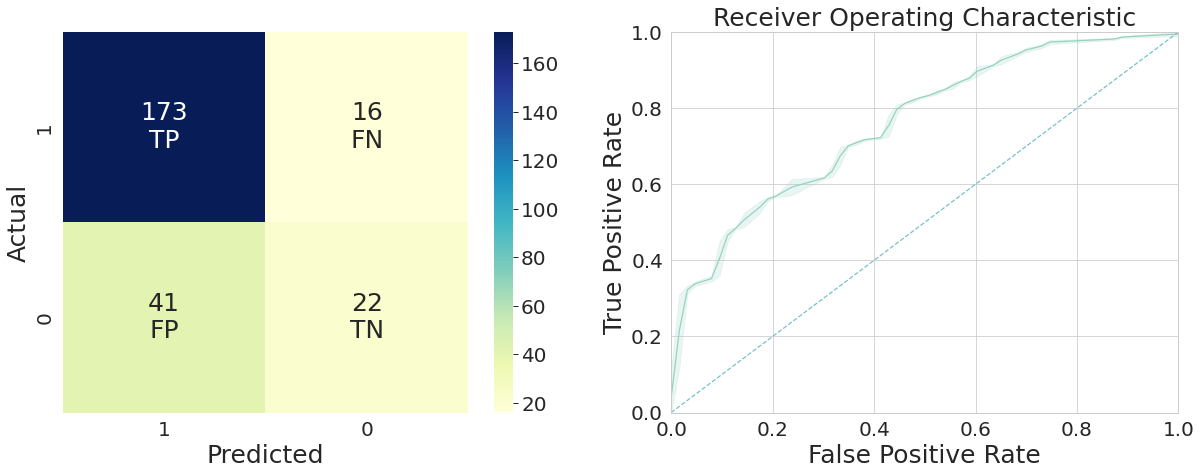

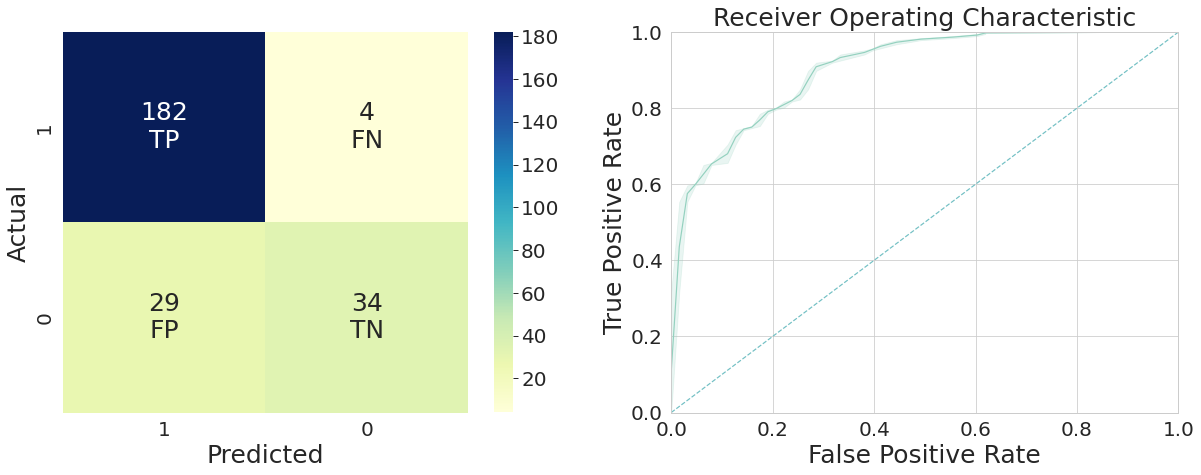

In [41]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                        max_depth = 6, min_child_weight=1, missing=None, n_estimators=50,
                        objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, subsample = 0.8)
acc_xgb_m,auc_xgb_m=CVcalculo("XGBoost", xgb,NSplits,datNum, label, train_index, test_index)


## Cat boost

In [ ]:
!pip install catboost

In [44]:
from catboost import CatBoostClassifier

Split 1

Learning rate set to 0.007669
0:	learn: 0.6877590	total: 794ms	remaining: 13m 13s
1:	learn: 0.6826536	total: 1.38s	remaining: 11m 30s
2:	learn: 0.6783515	total: 1.91s	remaining: 10m 36s
3:	learn: 0.6726386	total: 2.43s	remaining: 10m 4s
4:	learn: 0.6670156	total: 3.09s	remaining: 10m 15s
5:	learn: 0.6616856	total: 3.75s	remaining: 10m 21s
6:	learn: 0.6563323	total: 4.29s	remaining: 10m 8s
7:	learn: 0.6512170	total: 4.86s	remaining: 10m 2s
8:	learn: 0.6459478	total: 5.5s	remaining: 10m 5s
9:	learn: 0.6402097	total: 6.01s	remaining: 9m 54s
10:	learn: 0.6354893	total: 6.57s	remaining: 9m 50s
11:	learn: 0.6302914	total: 7.25s	remaining: 9m 57s
12:	learn: 0.6253976	total: 7.88s	remaining: 9m 58s
13:	learn: 0.6201551	total: 8.45s	remaining: 9m 55s
14:	learn: 0.6162434	total: 9.16s	remaining: 10m 1s
15:	learn: 0.6118228	total: 9.81s	remaining: 10m 3s
16:	learn: 0.6069959	total: 10.3s	remaining: 9m 57s
17:	learn: 0.6031775	total: 10.9s	remaining: 9m 56s
18:	learn: 0.5988867	total: 11.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 1
accuracy
83.52941176470588
AUC
0.7113997113997115
######################################


Split 2

Learning rate set to 0.007689
0:	learn: 0.6865276	total: 258ms	remaining: 4m 17s
1:	learn: 0.6789800	total: 452ms	remaining: 3m 45s
2:	learn: 0.6723613	total: 653ms	remaining: 3m 36s
3:	learn: 0.6666791	total: 844ms	remaining: 3m 30s
4:	learn: 0.6607138	total: 1.05s	remaining: 3m 29s
5:	learn: 0.6546400	total: 1.25s	remaining: 3m 27s
6:	learn: 0.6494279	total: 1.46s	remaining: 3m 27s
7:	learn: 0.6444037	total: 1.66s	remaining: 3m 25s
8:	learn: 0.6390128	total: 1.86s	remaining: 3m 24s
9:	learn: 0.6335008	total: 2.07s	remaining: 3m 24s
10:	learn: 0.6277603	total: 2.27s	remaining: 3m 23s
11:	learn: 0.6237244	total: 2.47s	remaining: 3m 23s
12:	learn: 0.6178405	total: 2.66s	remaining: 3m 22s
13:	learn: 0.6118349	total: 2.86s	remaining: 3m 21s
14:	learn: 0.6067828	total: 3.08s	remaining: 3m 22s
15:	learn: 0.6019210	total: 3.28s	remaining: 3m 21s
1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 2
accuracy
78.57142857142857
AUC
0.6455026455026456
######################################


Split 3

Learning rate set to 0.007709
0:	learn: 0.6884539	total: 268ms	remaining: 4m 27s
1:	learn: 0.6824828	total: 460ms	remaining: 3m 49s
2:	learn: 0.6776392	total: 658ms	remaining: 3m 38s
3:	learn: 0.6715960	total: 859ms	remaining: 3m 33s
4:	learn: 0.6663572	total: 1.07s	remaining: 3m 33s
5:	learn: 0.6608381	total: 1.27s	remaining: 3m 30s
6:	learn: 0.6559374	total: 1.47s	remaining: 3m 27s
7:	learn: 0.6513647	total: 1.66s	remaining: 3m 25s
8:	learn: 0.6472548	total: 1.86s	remaining: 3m 24s
9:	learn: 0.6425331	total: 2.06s	remaining: 3m 24s
10:	learn: 0.6376221	total: 2.26s	remaining: 3m 22s
11:	learn: 0.6334563	total: 2.46s	remaining: 3m 22s
12:	learn: 0.6280726	total: 2.65s	remaining: 3m 21s
13:	learn: 0.6231416	total: 2.85s	remaining: 3m 20s
14:	learn: 0.6187703	total: 3.06s	remaining: 3m 21s
15:	learn: 0.6138733	total: 3.26s	remaining: 3m 20s
1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


######################################
Split 3
accuracy
84.73895582329317
AUC
0.7299027137736815
######################################



SUMMARY
Mean of Splits Accuracy: 82.28 %
Standard Deviation of Splits Accuracy: 2.67 %

Mean of Splits AUC ROC : 0.70 
Standard Deviation of Splits AUC ROC : 0.04 


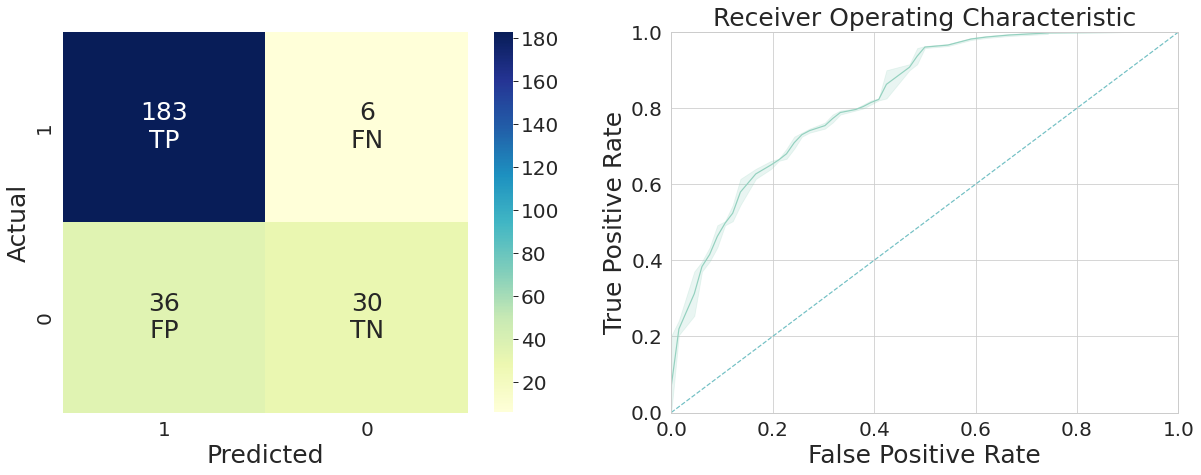

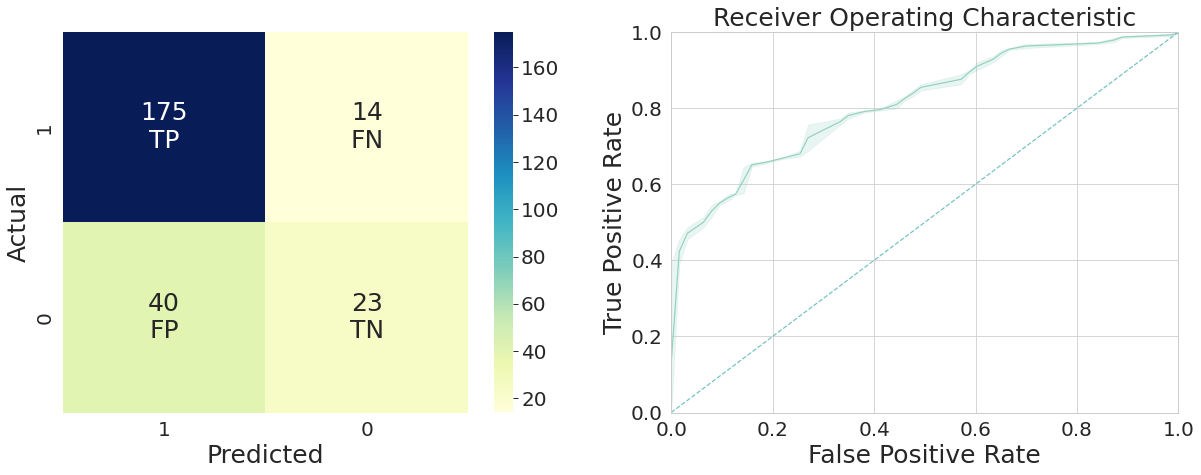

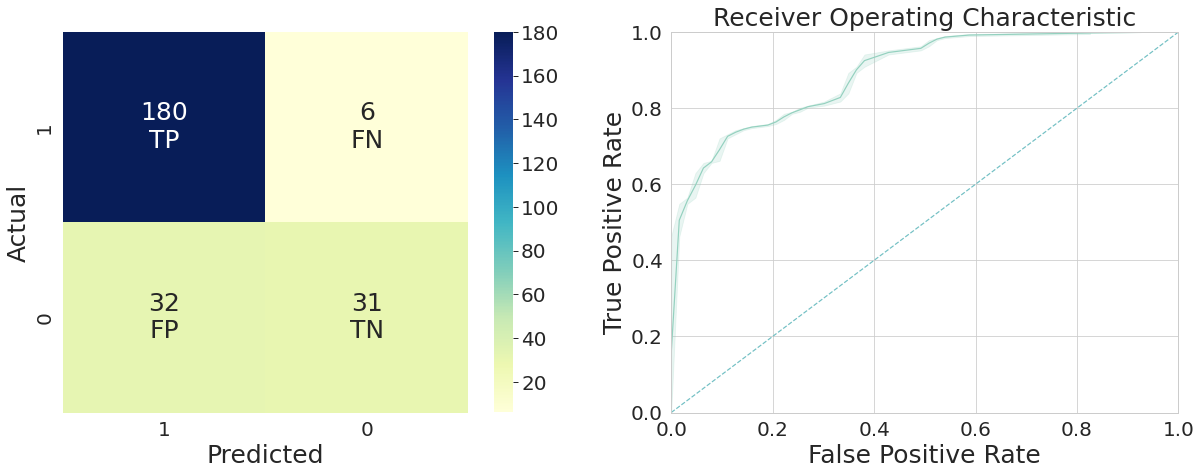

In [45]:
cb = CatBoostClassifier(depth=6)
acc_cat_m,auc_cat_m=CVcalculo("Cat Boost", cb,NSplits,datNum, label, train_index, test_index)

# Summary models - accuracy and AUC

In [47]:
acc = [acc_knn_m, acc_svm_m, acc_nb_m, acc_rf_m, acc_bc_m, acc_xgb_m, acc_cat_m]
print('ACCURACIES:\n KNN = '+str(acc_knn_m) + '\n SVM = '+str(acc_svm_m) + '\n NB = '+str(acc_nb_m) + '\n RF = '+str(acc_rf_m) + '\n BC = '+str(acc_bc_m) + '\n XGB = '+str(acc_xgb_m) + '\n CAT = '+str(acc_cat_m))
print('\n')
print('AREA UNDER THE CURVE:\n KNN = '+str(auc_knn_m) + '\n SVM = '+str(auc_svm_m) + '\n NB = '+str(auc_nb_m) + '\n RF = '+str(auc_rf_m) + '\n BC = '+str(auc_bc_m) + '\n XGB = '+str(auc_xgb_m) + '\n CAT = '+str(auc_cat_m))

ACCURACIES:
 KNN = 0.7776470963217953
 SVM = 0.7594105647613798
 NB = 0.7007229665627964
 RF = 0.8109560557824201
 BC = 0.7884032863480064
 XGB = 0.8307532651614863
 CAT = 0.8227993205314253


AREA UNDER THE CURVE:
 KNN = 0.6513393018769363
 SVM = 0.6670985326899306
 NB = 0.6635518006485749
 RF = 0.6706581948517433
 BC = 0.703414069005467
 XGB = 0.711022151882367
 CAT = 0.6956016902253461


# Conclusión

- El mejor modelo es el XGboost, con accuracy 0.83 y ROC 0.71.
- Si comparamos estos resultados con el análisis que hicimos usando SMOTE, está claro que el método FOLD da peor resultados que SMOTE. 